<a href="https://colab.research.google.com/github/Amirhatamian/ML-/blob/main/03_bayes_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bayes recommendation system

We are required to provide recommendation of football merchandising to users in our website. Suppose we know there are 5 teams in our world and we have a statistics of how many people support each team
* $T_1 → 45\%$
* $T_2 → 25\%$
* $T_3 → 15\%$
* $T_4 → 10\%$
* $T_5 → 5\%$



In [1]:
import random

# Team support statistics
team_support = {'T1': 45, 'T2': 25, 'T3': 15, 'T4': 10, 'T5': 5}

# Function to recommend merchandise based on team support
def recommend_merchandise():
    # Sort teams based on support percentages in descending order
    sorted_teams = sorted(team_support.items(), key=lambda x: x[1], reverse=True)

    # Recommendation logic
    top_team = sorted_teams[0][0]
    second_team = sorted_teams[1][0]
    third_team = sorted_teams[2][0]
    fourth_team = sorted_teams[3][0]
    fifth_team = sorted_teams[4][0]

    # Simulate user preference (randomly select a team)
    user_preference = random.choice([top_team, second_team, third_team, fourth_team, fifth_team])

    # Display recommendation
    print("Recommended merchandise based on user preference for", user_preference)
    print("1. Merchandise for", top_team)
    print("2. Merchandise for", second_team)
    print("3. Merchandise for", third_team)
    print("4. Merchandise for", fourth_team)
    print("5. Merchandise for", fifth_team)

# Call the function to get recommendations
recommend_merchandise()


Recommended merchandise based on user preference for T2
1. Merchandise for T1
2. Merchandise for T2
3. Merchandise for T3
4. Merchandise for T4
5. Merchandise for T5


If we have no information about the specific user, the best choice is to always output the team with most supporters in our population.

In [2]:
# Team support statistics
team_support = {'T1': 45, 'T2': 25, 'T3': 15, 'T4': 10, 'T5': 5}

# Function to recommend merchandise for the team with the highest support
def recommend_merchandise():
    # Find the team with the highest support
    top_team = max(team_support, key=team_support.get)

    # Display recommendation
    print("Recommended merchandise based on overall team support:")
    print("1. Merchandise for", top_team)

# Call the function to get recommendations
recommend_merchandise()


Recommended merchandise based on overall team support:
1. Merchandise for T1


Now suppose we can collect some information about the specific user. We can observe him/her and acquire a vector of features $\mathbf{x}$ representing the user.


# Generate 5 gaussian distributions with different $\mu$ and $\sigma$.


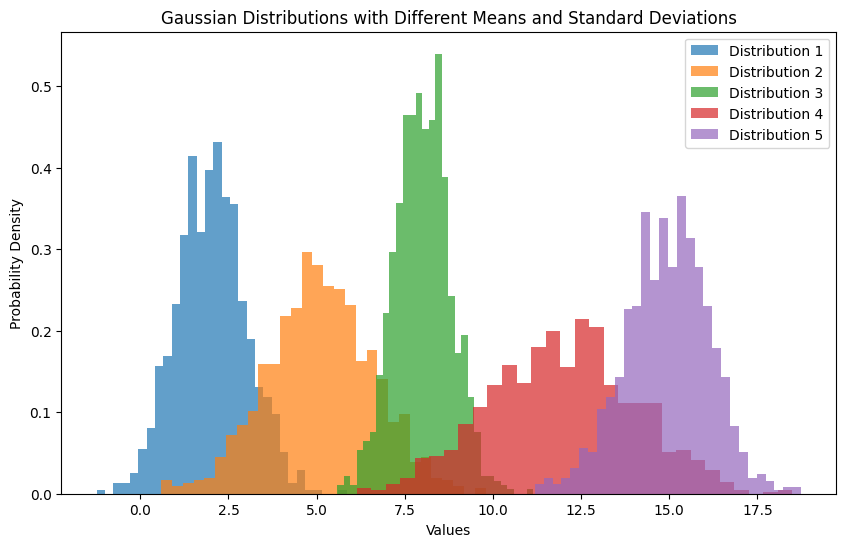

In [4]:
# Generate 5 gaussian distributions with different $\mu$ and $\sigma$.
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples to generate
num_samples = 1000

# Generate Gaussian distributions with different means and standard deviations
mean_values = [2, 5, 8, 12, 15]
std_dev_values = [1, 1.5, 0.8, 2, 1.2]

# Generate samples for each distribution
samples = []
for mean, std_dev in zip(mean_values, std_dev_values):
    distribution = np.random.normal(mean, std_dev, num_samples)
    samples.append(distribution)

# Plot the Gaussian distributions
plt.figure(figsize=(10, 6))
for i, sample in enumerate(samples):
    plt.hist(sample, bins=30, density=True, alpha=0.7, label=f'Distribution {i+1}')

plt.title('Gaussian Distributions with Different Means and Standard Deviations')
plt.xlabel('Values')
plt.ylabel('Probability Density')
plt.legend()
plt.show()



# for the bravest: use multimodal gaussian distributions.


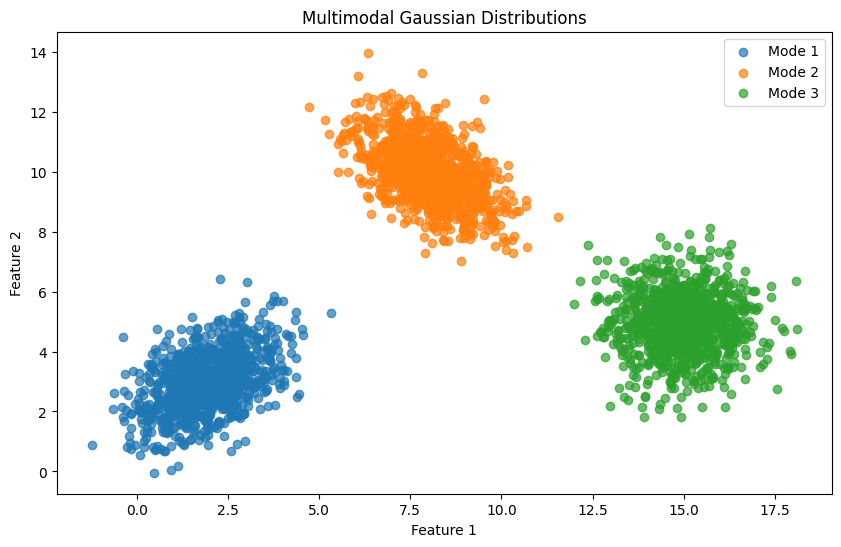

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples to generate
num_samples = 1000

# Means and covariances for each mode
modes = [
    {'mean': [2, 3], 'cov': [[1, 0.5], [0.5, 1]]},
    {'mean': [8, 10], 'cov': [[1, -0.5], [-0.5, 1]]},
    {'mean': [15, 5], 'cov': [[1, 0], [0, 1]]}
]

# Generate samples for each mode
samples = []
for mode in modes:
    distribution = multivariate_normal(mean=mode['mean'], cov=mode['cov'])
    sample = distribution.rvs(size=num_samples)
    samples.append(sample)

# Plot the multimodal Gaussian distributions
plt.figure(figsize=(10, 6))
for i, sample in enumerate(samples):
    plt.scatter(sample[:, 0], sample[:, 1], alpha=0.7, label=f'Mode {i+1}')

plt.title('Multimodal Gaussian Distributions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
